In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [234]:
from proj1_helpers import *

DATA_TRAIN_PATH = '../../../Data-Project1/train.csv' # TODO: add a file Data-Project1 with the train data 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [236]:
# TODO: Get rid of the -999 in the data
tX = np.where(tX == -999, 0, tX)

In [239]:
from helpers import *

# Standardize the input data
stx, mean_stx, std_x = standardize(tX)

## Do your thing crazy machine learning thing here :) ...

In [209]:
# Initialize parameters
gamma = 1e-6
lambda_ = 0.001
max_iters = 10000

## Attempt to preprocess the data and the features

In [240]:
# y must be 0 or 1 and not -1 or 1
def set_y(y):
    y = np.where(y == -1, 0, y)
    return y
y = set_y(y)

> Get rid of the Features that does not provide any more information than the background

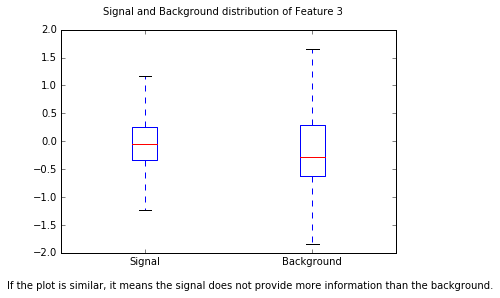

In [241]:
idx_f = 2
signal = stx[np.where(y == 1), idx_f + 1]
background = stx[np.where(y == 0), idx_f + 1]

plot = plt.figure()
plt.boxplot([signal, background], 0, '')
plt.xticks([1, 2], ['Signal', 'Background'])
plot.suptitle('Signal and Background distribution of Feature {f}'.format(f = idx_f + 1))

textvar = plot.text(0, 0, 'If the plot is similar, it means the signal does not provide more information than the background.')

## Linear regression using Gradient Descent 

In [8]:
from costs import *

def compute_gradient(y, tx, w):
    """Compute the gradient."""
    e = y - tx @ w
    return -(tx.T @ e)/len(y)

def least_squares_GD(y, tx, gamma, max_iters):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    w = np.zeros(tx.shape[1])
    ws = [np.copy(w)]
    losses = []
    for n_iter in range(max_iters):
        # compute gradient with mse
        grad = compute_gradient(y, tx, w)
        
        # update w
        w = w - (gamma*grad)
        
        # calculate the cost with mse
        loss = compute_loss(y, tx, w)
        
        # store w and loss
        ws.append(np.copy(w))
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}".format(
              bi=n_iter, ti=max_iters - 1, l=loss))
    print("Optimal weights: {w}".format(w=ws[tx.shape[1]]))
    return losses, ws

least_squares_GD(y, stx, gamma, max_iters)

Gradient Descent(0/99): loss=0.4999963900686185
Gradient Descent(1/99): loss=0.4999927803975364
Gradient Descent(2/99): loss=0.49998917098672546
Gradient Descent(3/99): loss=0.4999855618361562
Gradient Descent(4/99): loss=0.4999819529458001
Gradient Descent(5/99): loss=0.49997834431562804
Gradient Descent(6/99): loss=0.49997473594561126
Gradient Descent(7/99): loss=0.499971127835721
Gradient Descent(8/99): loss=0.4999675199859281
Gradient Descent(9/99): loss=0.499963912396204
Gradient Descent(10/99): loss=0.49996030506651984
Gradient Descent(11/99): loss=0.4999566979968465
Gradient Descent(12/99): loss=0.4999530911871556
Gradient Descent(13/99): loss=0.499949484637418
Gradient Descent(14/99): loss=0.4999458783476047
Gradient Descent(15/99): loss=0.4999422723176872
Gradient Descent(16/99): loss=0.4999386665476362
Gradient Descent(17/99): loss=0.4999350610374235
Gradient Descent(18/99): loss=0.49993145578701975
Gradient Descent(19/99): loss=0.4999278507963965
Gradient Descent(20/99): los

([0.49999639006861851,
  0.49999278039753642,
  0.49998917098672546,
  0.49998556183615622,
  0.49998195294580011,
  0.49997834431562804,
  0.49997473594561126,
  0.49997112783572101,
  0.49996751998592809,
  0.49996391239620402,
  0.49996030506651984,
  0.4999566979968465,
  0.49995309118715558,
  0.49994948463741801,
  0.49994587834760468,
  0.49994227231768718,
  0.49993866654763619,
  0.49993506103742352,
  0.49993145578701975,
  0.49992785079639651,
  0.49992424606552477,
  0.4999206415943756,
  0.49991703738292043,
  0.49991343343113026,
  0.49990982973897652,
  0.49990622630643006,
  0.49990262313346245,
  0.49989902022004479,
  0.49989541756614803,
  0.49989181517174375,
  0.49988821303680281,
  0.49988461116129668,
  0.49988100954519654,
  0.49987740818847359,
  0.49987380709109919,
  0.49987020625304429,
  0.49986660567428037,
  0.49986300535477879,
  0.49985940529451034,
  0.4998558054934466,
  0.49985220595155883,
  0.49984860666881814,
  0.49984500764519574,
  0.4998414088

## Lienear regression using stochastic gradient descent

In [61]:
def least_squares_SGD(y, tx, gamma, max_iters):
    """Stochastic gradient descent algorithm."""
    # Define parameters to store w and loss
    w = np.zeros(tx.shape[1])
    ws = [np.copy(w)]
    losses = []
    batch_size = 50000
    
    for n_iter in range(max_iters):
        # compute gradient for each ini batch
        a = 0;
        for minibatch_y, minibatch_tx in batch_iter(y, tx, batch_size, num_batches=1):
            grad = compute_gradient(minibatch_y, minibatch_tx, w)
            
            # upgrade w
            w = w - (gamma*grad)

            # compute loss with mse
            loss = compute_loss(y, tx, w)

            # store w and loss
            ws.append(np.copy(w))
            losses.append(loss)
    print("Optimal weights: {w}\n\n Loss: {l}".format(w=ws[tx.shape[1]], l = loss))
    return losses, ws

losses, ws = least_squares_SGD(y, stx, gamma, max_iters)
w_LSSGD = ws[-1]
w_LSSGD = w_LSSGD[1:]

Optimal weights: [  5.27869824e-03   1.71253932e-03  -2.52518418e-03  -9.36860527e-05
   1.32839667e-03   9.47100796e-04   1.31719863e-03   9.39094888e-04
   1.32712503e-04  -1.49537650e-04   1.03580845e-03  -1.41589558e-03
   1.91439301e-03   9.44896377e-04   1.67979463e-03  -2.08030394e-05
  -3.23216186e-05  -2.36116320e-04  -2.06285519e-06   2.93381688e-05
   1.24568851e-04   5.30971451e-05   9.04016896e-04   8.77697104e-04
   1.06408916e-03   1.01471739e-03   1.01470462e-03   9.39531517e-04
   9.44311766e-04   9.44247392e-04   8.91812361e-04]

 Loss: 0.11649558213603164


## Least squares regression using normal equations

In [242]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    w = np.linalg.solve(tx.T @ tx, tx.T @ y)
    return w, compute_loss(y, tx, w)

least_squares(y, stx)

(array([  3.42668000e-01,   1.58277718e-02,  -1.23987553e-01,
         -1.32481310e-01,  -1.31815676e-02,  -7.07734465e-03,
          5.78825204e-02,  -8.30935352e-03,   1.33900842e-01,
         -8.73638867e-04,  -1.54334711e+02,  -9.22295973e-02,
          6.02852016e-02,   5.05599100e-02,   2.99860695e+01,
         -5.33790607e-04,  -4.79258766e-04,   2.95719248e+01,
         -1.38923902e-04,   1.22073148e-03,   5.03268206e-02,
          4.30911494e-04,  -2.94494159e-02,   7.10465945e-03,
          7.97349116e-02,   2.45534102e-04,   8.17367611e-06,
          1.79759297e-02,   6.46911290e-04,  -9.52074304e-04,
          1.30597853e+02]), 0.084753996835327028)

## Ridge regression using normal equations

In [243]:
def ridge_regression(y, tx, lamb):
    """implement ridge regression."""
    w = np.linalg.solve((tx.T @ tx) + lamb*np.eye(tx.shape[1]), tx.T @ y)
    return w, compute_loss(y, tx, w)

lamb = 0
weights, loss = ridge_regression(y, stx, lamb)
weights = weights[1:]
print(loss)

0.0847539968353


## Logistic regression using gradient or SGD

In [213]:
def sigmoid(t):
    """apply sigmoid function on t."""
    # equivalent to use 1/(1+exp(-t)) but avoids overflow
    return np.exp(-np.logaddexp(0, -t))

In [214]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    #for n in range(N):
    #   cost += np.log(1+np.exp(tx[n, :].T @ w)) - (y[n] * tx[n, :].T @ w)
    y = y.reshape((-1, 1))
    return np.sum(np.logaddexp(0, tx @ w)) - y.T @ (tx @ w)

In [215]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    sig = sigmoid(tx @ w)
    sig = sig.reshape(sig.shape[0],)
    return tx.T @ (sig - y)

In [216]:
def learning_by_gradient_descent(y, tx, w, gamma, lambda_):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """
    loss = calculate_loss(y, tx, w) + lambda_* (w.T @ w)
    gradient = calculate_gradient(y, tx, w)
    
    w.shape = (w.shape[0],)
    w = w - gamma * gradient
    return loss, w

In [244]:
def logistic_regression(y, tx, gamma, max_iters):
    """
    Logistic regression using GD
    """
    # init parameters
    threshold = 0.001
    losses = []

    # build w
    w = np.zeros((tx.shape[1], 1))
    
    # y must be 0 or 1 and not -1 or 1(as implemented in the lab)
    y = np.where(y == -1, 0, y)

    # start the logistic regression
    for iter in range(max_iters):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma, lambda_ = 0)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria ( max_iters is really high)
        losses.append(np.copy(loss))
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return loss, w

loss_LR, w_LR = logistic_regression(y, stx, gamma, max_iters)
w_LR = w_LR[1:]

Current iteration=0, the loss=[[ 173286.79513999]]
Current iteration=500, the loss=[ 124733.61536359]
Current iteration=1000, the loss=[ 124324.35151141]
Current iteration=1500, the loss=[ 124229.56953406]
Current iteration=2000, the loss=[ 124192.00362781]
Current iteration=2500, the loss=[ 124173.35716581]
Current iteration=3000, the loss=[ 124163.35477459]
Current iteration=3500, the loss=[ 124157.83842567]
Current iteration=4000, the loss=[ 124154.76035869]
Current iteration=4500, the loss=[ 124153.03246971]
Current iteration=5000, the loss=[ 124152.05896883]


## Regularized  logistic  regression  using  gradient  descent or SGD

In [219]:
def reg_logistic_regression(y, tx, lambda_, gamma, max_iters):
    """
    Logistic regression using GD
    """
    # init parameters
    threshold = 0.001
    losses = []

    # build w
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iters):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma, lambda_)
        # log info
        if iter % 500 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria ( max_iters is really high)
        losses.append(np.copy(loss))
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return loss, w

reg_logistic_regression(y, stx, lambda_, gamma, max_iters)

Current iteration=0, the loss=[[ 173286.79513999]]
Current iteration=500, the loss=[ 124850.08883299]
Current iteration=1000, the loss=[ 124422.71522011]


KeyboardInterrupt: 

## Cross Validation

Take the minimum of rmse_te

In [82]:
from cross_validation import *
seed = 1
k_fold = 4
lambdas = np.logspace(-4, 2, 30)
cross_validation_demo(y, stx, k_fold, lambdas, seed)

[0.41204722492031676,
 0.41204721002951061,
 0.41204719705707027,
 0.41204718339007779,
 0.412047166828582,
 0.41204714594790171,
 0.41204712184092918,
 0.41204710306765624,
 0.41204711738064431,
 0.41204723533380683,
 0.41204760783856637,
 0.41204850296495621,
 0.4120502973204177,
 0.4120533858388139,
 0.41205810344262617,
 0.41206489433932375,
 0.41207477223868794,
 0.41208961808453776,
 0.41211168479805294,
 0.41214222407779422,
 0.41218006782859712,
 0.412221386900891,
 0.41226113064287945,
 0.41229521199110714,
 0.41232180663672302,
 0.41234115965334822,
 0.41235461434661813,
 0.41236373528964693,
 0.41236986887827415,
 0.4123740828946279]

## Generate predictions and save ouput in csv format for submission:

In [27]:
DATA_TEST_PATH = '../../../Data-Project1/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [247]:
OUTPUT_PATH = '../../../Data-Project1/Data_submission.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)